# Stock Forecasting using PyFlux

### GAS models

https://github.com/RJT1990/pyflux

In [1]:
# Data manipulation
# ==============================================================================
import pandas as pd
import numpy as np
import datetime

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Modelling and Forecasting
# ==============================================================================
import pyflux as pf

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

# Yahoo finance is used to fetch data 
# ==============================================================================
import yfinance as yf
yf.pdr_override()

In [2]:
symbol = '^GSPC' # input
start = '1970-01-01' # input 
end = '2022-07-18'  # input
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-01-02,0.0,93.540001,91.790001,93.000000,93.000000,8050000
1970-01-05,0.0,94.250000,92.529999,93.459999,93.459999,11490000
1970-01-06,0.0,93.809998,92.129997,92.820000,92.820000,11460000
1970-01-07,0.0,93.379997,91.930000,92.629997,92.629997,10010000
1970-01-08,0.0,93.470001,91.989998,92.680000,92.680000,10670000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3854.429932,3023830000
2022-07-12,3851.949951,3873.409912,3802.360107,3818.800049,3818.800049,0
2022-07-13,3779.669922,3829.439941,3759.070068,3801.780029,3801.780029,3166580000
2022-07-14,3763.989990,3796.409912,3721.560059,3790.379883,3790.379883,3447500000
2022-07-15,3818.000000,3863.620117,3817.179932,3863.159912,3863.159912,3537130000


In [5]:
# df = df.drop(['Volume', axis=1)
df = df.drop(columns=['Volume', 'Close'], axis=1)

In [6]:
df.shape

(13252, 4)

In [7]:
df = df.resample('A').last()

In [8]:
df.head()

,Open,High,Low,Adj Close
Date,,,,
1970-12-31,0.0,92.790001,91.360001,92.150002
1971-12-31,0.0,102.089996,102.089996,102.089996
1972-12-31,0.0,118.769997,116.699997,118.050003
1973-12-31,0.0,98.300003,95.949997,97.550003
1974-12-31,0.0,69.040001,67.150002,68.559998


In [9]:
df.shape

(53, 4)

In [10]:
df['Year'] = df.index.year

In [11]:
df.iloc[:,0:23].values

array([[   0.        ,   92.79000092,   91.36000061,   92.15000153,
        1970.        ],
       [   0.        ,  102.08999634,  102.08999634,  102.08999634,
        1971.        ],
       [   0.        ,  118.76999664,  116.69999695,  118.05000305,
        1972.        ],
       [   0.        ,   98.30000305,   95.94999695,   97.55000305,
        1973.        ],
       [   0.        ,   69.04000092,   67.15000153,   68.55999756,
        1974.        ],
       [   0.        ,   90.75      ,   89.16999817,   90.19000244,
        1975.        ],
       [   0.        ,  107.81999969,  106.55000305,  107.45999908,
        1976.        ],
       [   0.        ,   95.66999817,   94.44000244,   95.09999847,
        1977.        ],
       [   0.        ,   97.02999878,   95.48000336,   96.11000061,
        1978.        ],
       [   0.        ,  108.52999878,  107.26000214,  107.94000244,
        1979.        ],
       [   0.        ,  136.75999451,  134.28999329,  135.75999451,
        1980

In [12]:
numpy_data = np.sum(df.iloc[:,0:53].values,axis=1)
numpy_data

array([ 2246.30000305,  2277.26998901,  2325.51999664,  2264.80000305,
        2178.75      ,  2245.11000061,  2297.83000183,  2262.20999908,
        2266.62000275,  2302.73000336,  2386.8099823 ,  2348.54000092,
        2544.02999878,  2642.41999817,  2650.8999939 ,  2829.24998474,
        2956.84999084,  2975.        ,  3102.61001587,  3397.16000366,
        3306.66000366,  3654.2800293 ,  3741.82998657,  3865.31002808,
        3835.79998779,  4453.33996582,  4985.27996826,  5880.70001221,
        6921.30004883,  7863.32995605,  7312.10998535,  6619.30004883,
        5512.59002686,  6443.33007812,  6858.45007324,  7008.72009277,
        7692.84997559,  7891.56994629,  5601.83001709,  6493.15002441,
        7037.92993164,  7052.99987793,  7665.4699707 ,  9395.81994629,
       10298.5300293 , 10225.69006348, 10993.64038086, 12745.49023438,
       12015.85009766, 14908.70996094, 16996.41992188, 21114.97021484,
       17383.95996094])

In [13]:
numpy_data[np.isnan(numpy_data)] = 0
stock_crises = pd.DataFrame(numpy_data)
stock_crises.index = df.Year
stock_crises.columns = ["Number of Stock crises"]

In [14]:
model = pf.GAS(ar=2, sc=2, data=stock_crises, family=pf.Poisson())

In [15]:
x = model.fit("MLE")
x.summary()

PoissonGAS (2,0,2)                                                                                        
======================================================= ==================================================
Dependent Variable: Number of Stock crises              Method: MLE                                       
Start Date: 1972                                        Log Likelihood: -11816.4511                       
End Date: 2022                                          AIC: 23642.9022                                   
Number of observations: 51                              BIC: 23652.5613                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 7.2532     0.1322     54.8676  0.0      (6.9941 | 7.5123)        
AR(1)                                

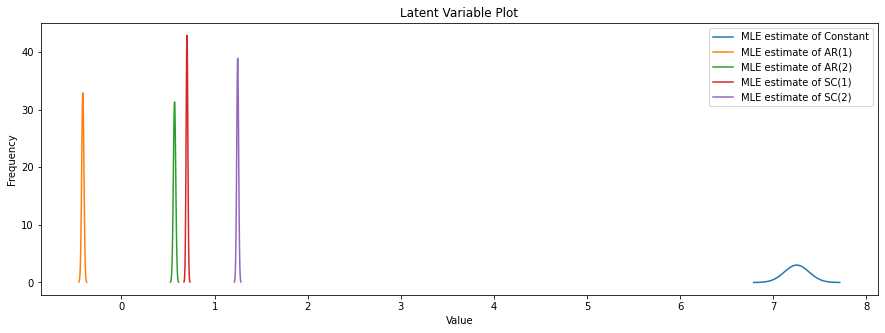

In [16]:
model.plot_z(figsize=(15,5))

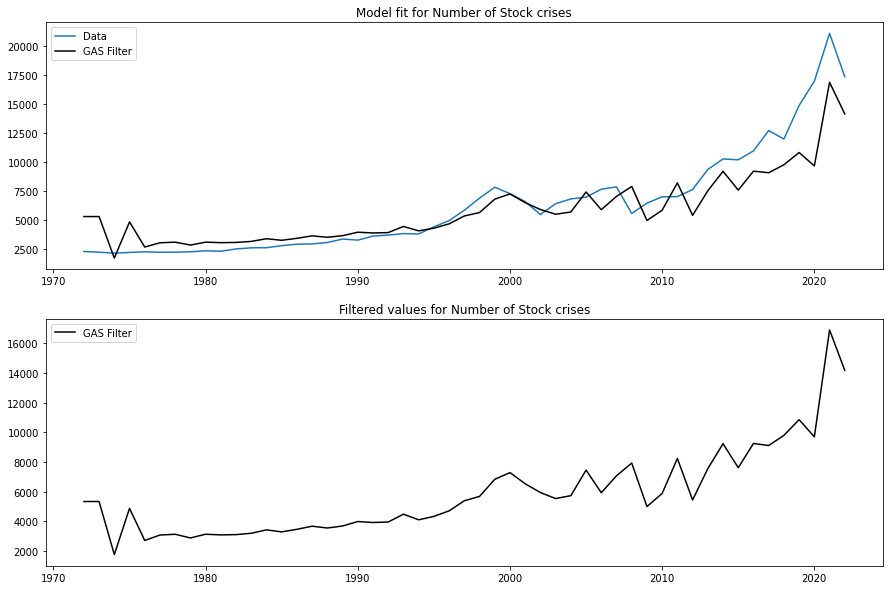

In [17]:
model.plot_fit(figsize=(15,10))

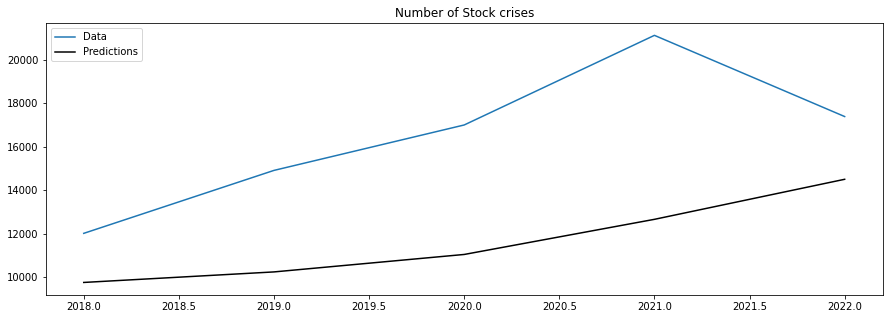

In [18]:
model.plot_predict_is(fit_once=True, figsize=(15,5))

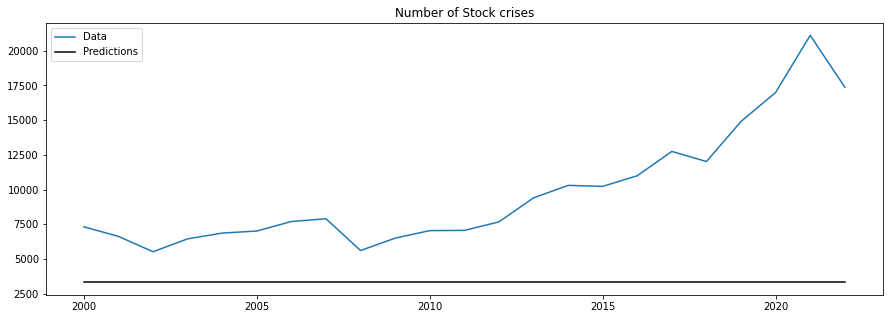

In [19]:
model.plot_predict_is(h=23, fit_once=True, figsize=(15,5))

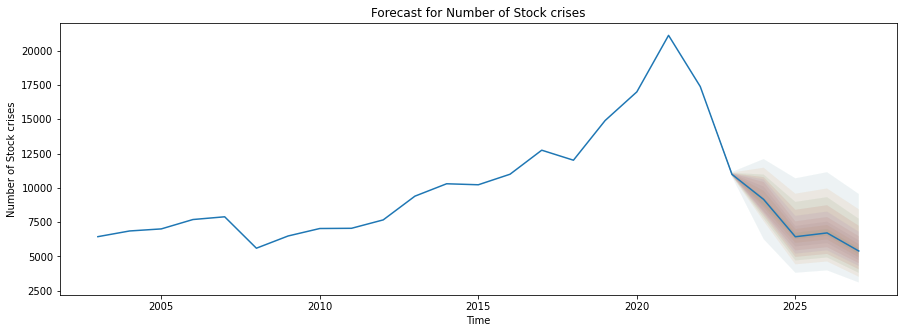

In [20]:
model.plot_predict(figsize=(15,5))

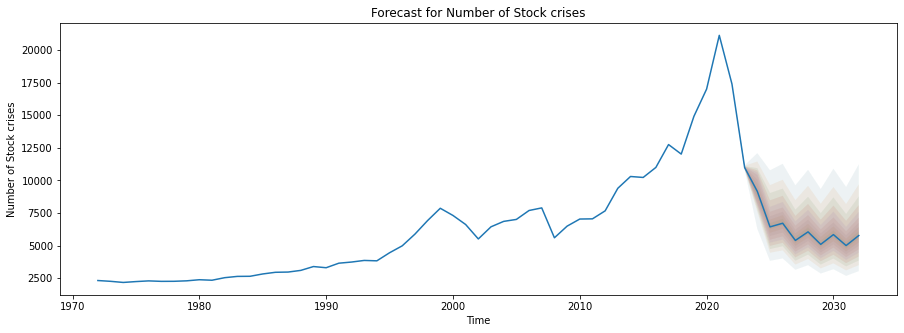

In [22]:
model.plot_predict(h=10, past_values=100, figsize=(15,5))